In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

this dataset has 150 rows and 6 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


no null values in this dataset

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


here the problem is a classification problem with target variable as Species with 3 classes

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import cm

In [11]:
df = df.drop(['Id'], axis = 1)

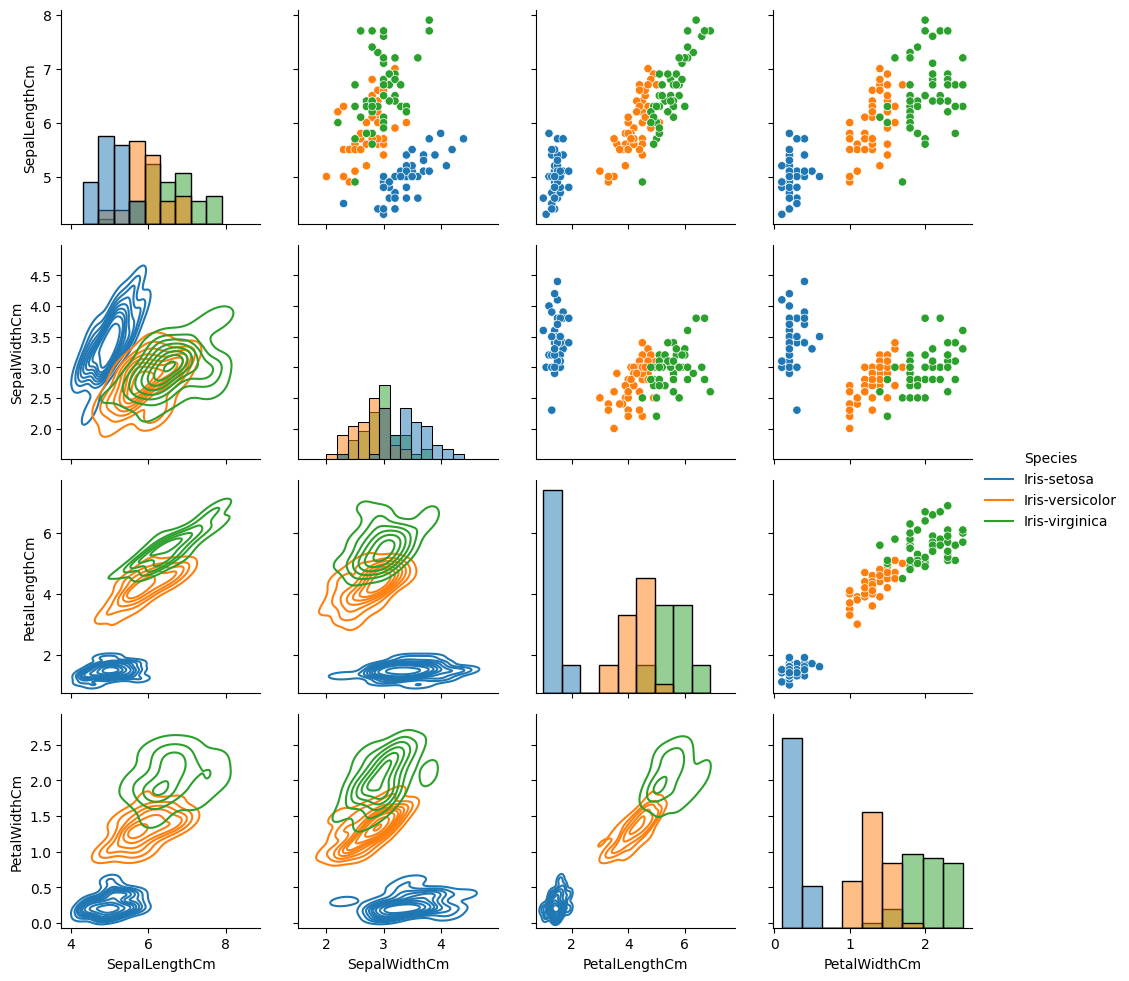

In [12]:
g = sns.PairGrid(df, hue = 'Species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

g.add_legend(title='Species')
plt.show()

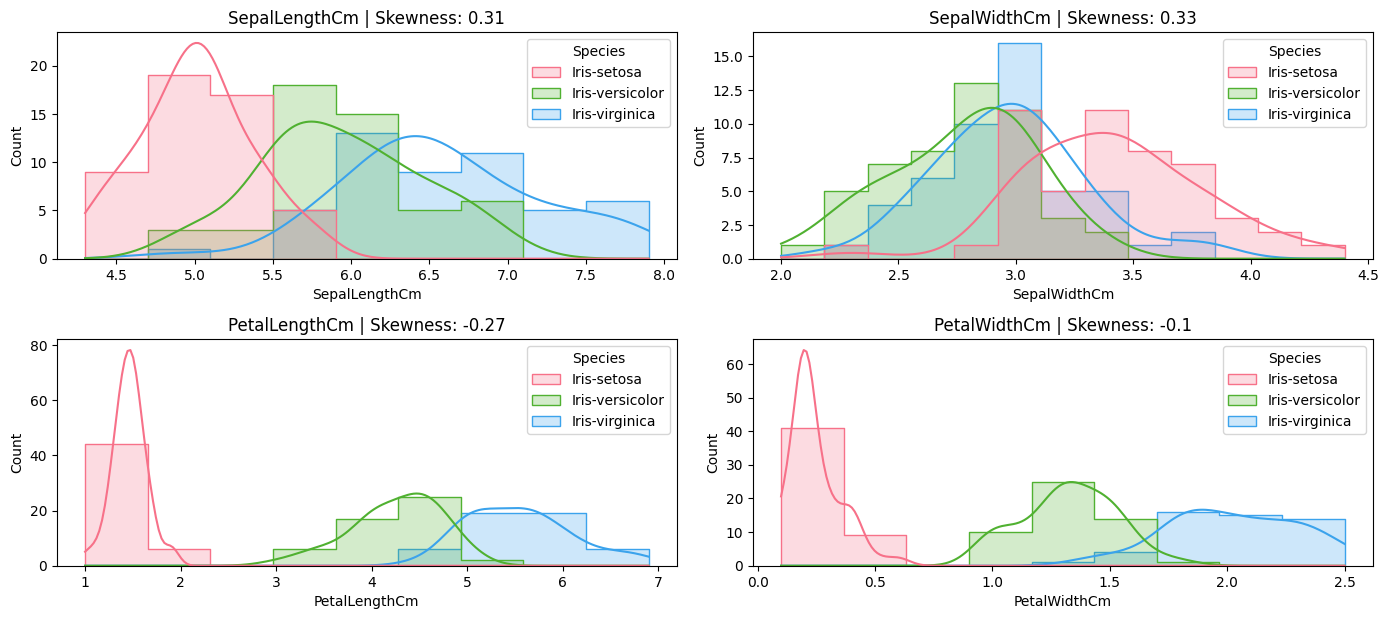

In [14]:
numerical_columns = df.select_dtypes(include=["float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data=df, x=feature, kde=True, hue='Species', element="step", palette="husl")
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

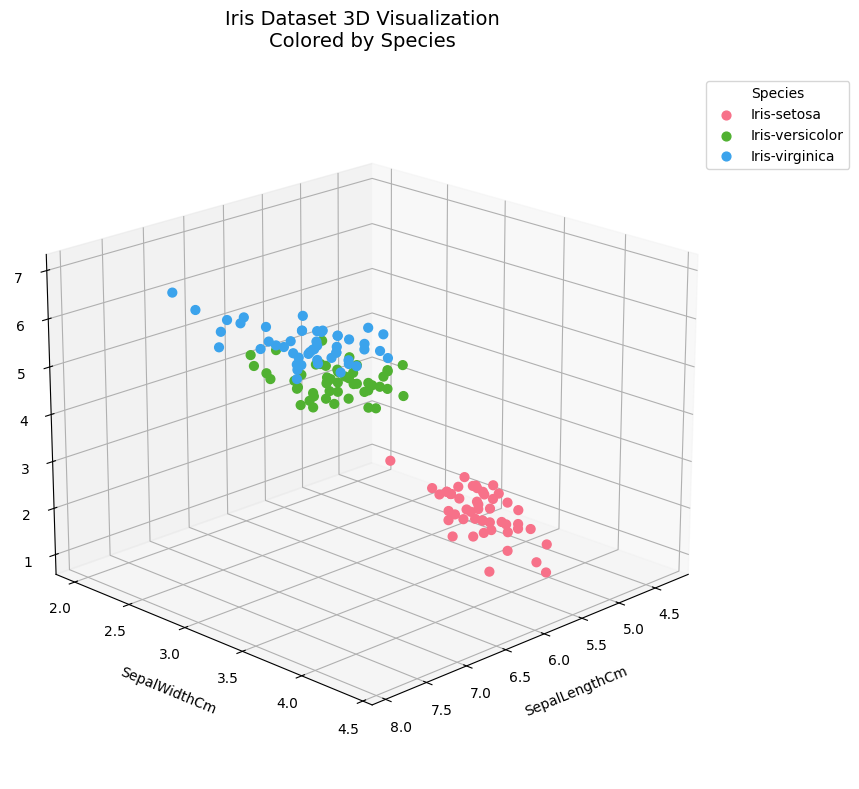

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("husl", len(df['Species'].unique()))
color_map = {species: palette[i] for i, species in enumerate(df['Species'].unique())}

for species, group in df.groupby('Species'):
    ax.scatter(
        group['SepalLengthCm'],
        group['SepalWidthCm'],
        group['PetalLengthCm'],
        s=40,
        color=color_map[species],
        marker='o',
        alpha=1,
        label=species
    )

ax.set_xlabel('SepalLengthCm', labelpad=10)
ax.set_ylabel('SepalWidthCm', labelpad=10)
ax.set_zlabel('PetalLengthCm', labelpad=10)

ax.legend(title='Species', bbox_to_anchor=(1.2, 1))

ax.set_title('Iris Dataset 3D Visualization\nColored by Species', fontsize=14, pad=20)
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

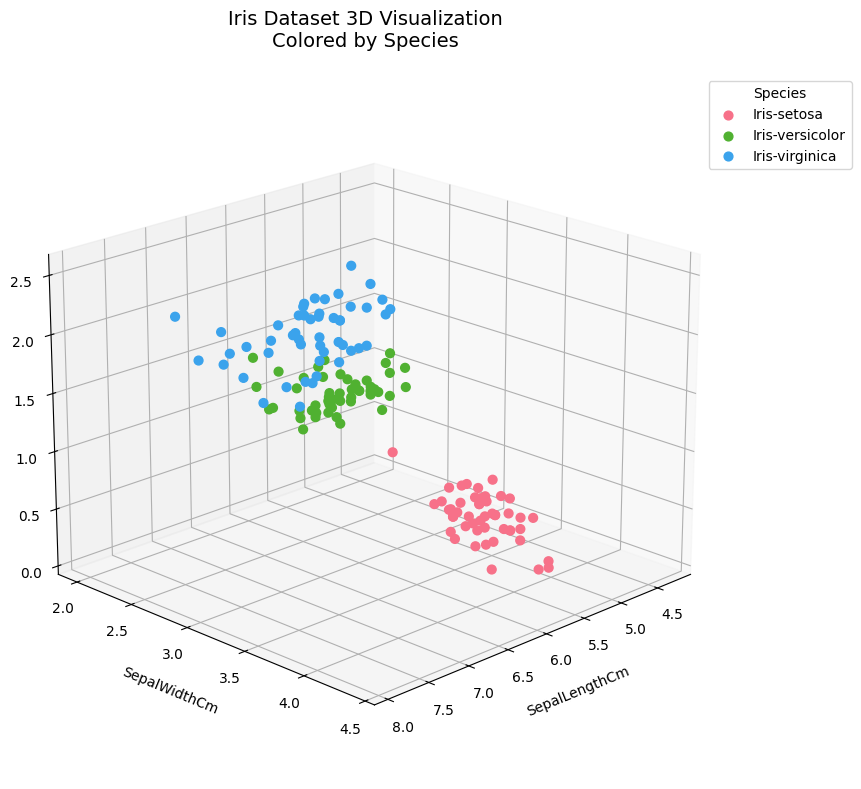

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("husl", len(df['Species'].unique()))
color_map = {species: palette[i] for i, species in enumerate(df['Species'].unique())}

for species, group in df.groupby('Species'):
    ax.scatter(
        group['SepalLengthCm'],
        group['SepalWidthCm'],
        group['PetalWidthCm'],
        s=40,
        color=color_map[species],
        marker='o',
        alpha=1,
        label=species
    )

ax.set_xlabel('SepalLengthCm', labelpad=10)
ax.set_ylabel('SepalWidthCm', labelpad=10)
ax.set_zlabel('PetalWidthCm', labelpad=10)

ax.legend(title='Species', bbox_to_anchor=(1.2, 1))

ax.set_title('Iris Dataset 3D Visualization\nColored by Species', fontsize=14, pad=20)
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])


X = df.drop(['Species'], axis = 1)
y = df['Species']

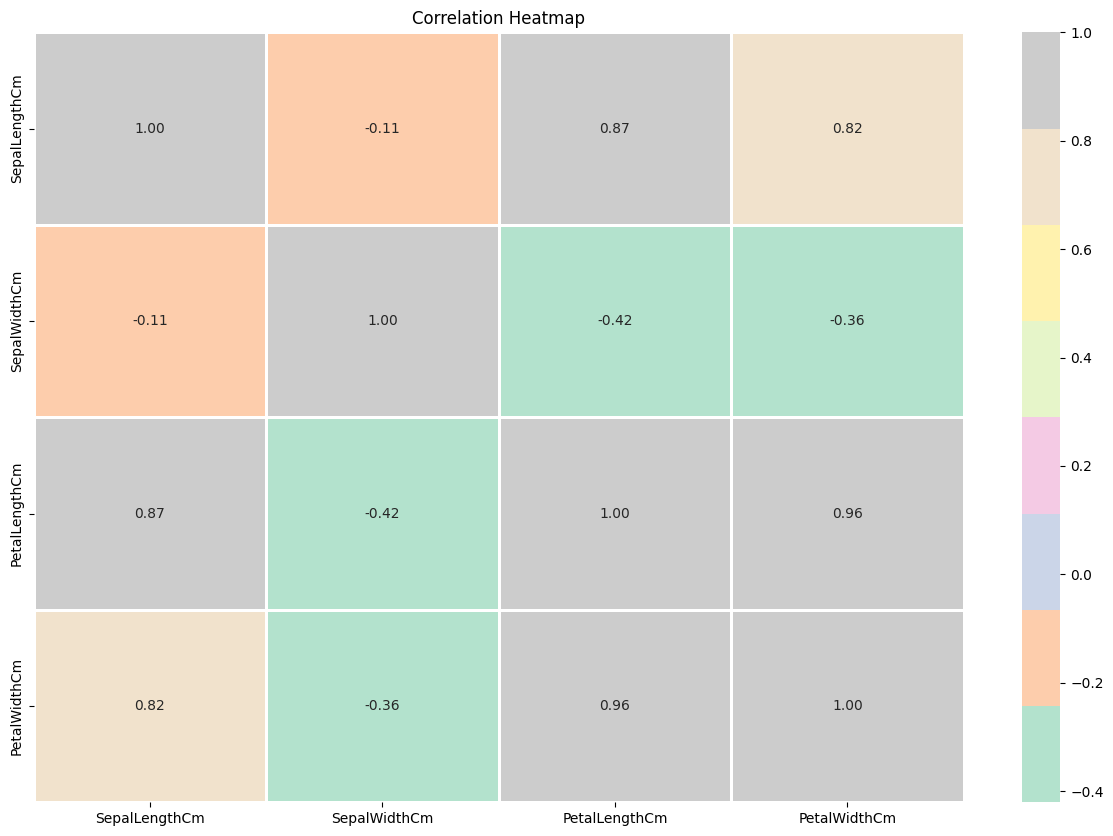

In [18]:
plt.figure(figsize=(15, 10))

sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

here we can see that petal length and petal width have very high correlation

Machine Learning Algorithms

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [22]:
#SVM

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [23]:
y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [24]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred_clf = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [26]:
import xgboost as xgb
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
y_pred_xgb = xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [29]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'KNN': y_pred_knn,
    'Support Vector': y_pred_svm,
    'Random Forest': y_pred_clf,
    'XGBoost': y_pred_xgb,
    'Decision Tree': y_pred_dt
}

for name, y_pred in models.items():
    print(f"----- {name} -----")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}\n")

----- KNN -----
MSE: 0.03
R2 Score: 0.95

----- Support Vector -----
MSE: 0.03
R2 Score: 0.95

----- Random Forest -----
MSE: 0.03
R2 Score: 0.95

----- XGBoost -----
MSE: 0.03
R2 Score: 0.95

----- Decision Tree -----
MSE: 0.07
R2 Score: 0.91



In [32]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 50}


In [33]:
clf2 = RandomForestClassifier(max_depth = 3, n_estimators = 50)

clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [34]:
y_pred_clf2 = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf2)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
